# 環境設定

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 中文設定

In [2]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-10-18 09:28:58--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.217.100, 173.194.217.113, 173.194.217.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h8gfo487n3a9rlo4i26382nucbmekfn6/1666085325000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=91859492-dd8e-4d5c-bf4f-b89b1f867e6c [following]
--2022-10-18 09:29:02--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h8gfo487n3a9rlo4i26382nucbmekfn6/1666085325000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=91859492-dd8e-4d5c-bf4f-b89b1f867e6c
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to d

# 匯入資料

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [4]:
tomato = pd.read_excel('蕃茄-牛蕃茄.xlsx')

# 補齊缺失資料

In [5]:
tomato = tomato[tomato[:]!='NULL']

### 以折線圖呈現市場「台北一」的價格走勢

In [6]:
p1_market_name = "台北一"
p1_price = tomato[ tomato["MarketName"]==p1_market_name ]["Avg_Price"]
p1_date = tomato[ tomato["MarketName"]==p1_market_name ]["TransDate"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


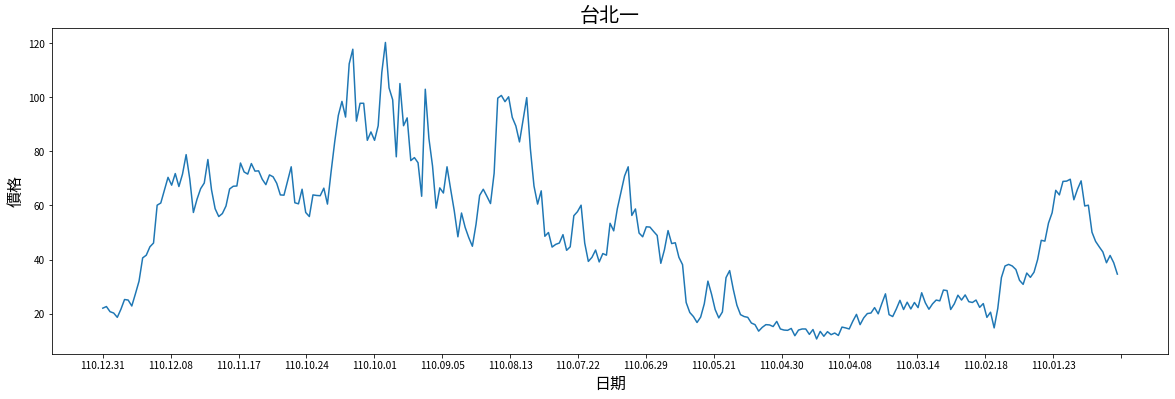

In [8]:
import matplotlib.ticker as mticker

plt.figure( figsize=(20,6) )
plt.xlabel('日期',fontsize=16)
plt.ylabel('價格',fontsize=16)
ax = plt.subplot()
plt.title(p1_market_name,fontsize=20)
ax.plot(p1_date, p1_price)
tick_spacing = len(p1_date)/15
ax.xaxis.set_major_locator(mticker.MultipleLocator(tick_spacing))
plt.show()

### 以圓餅圖呈現各個市場在十月份的交易量配比

In [9]:
p2_market_name = list(set(tomato['MarketName']))
p2_quantity_list = list()
for name in p2_market_name:
  trans_q = tomato[ tomato['MarketName']==name ]['Trans_Quantity'].sum()
  p2_quantity_list.append(trans_q)
p2_quantity_list = list( map(int,p2_quantity_list) )

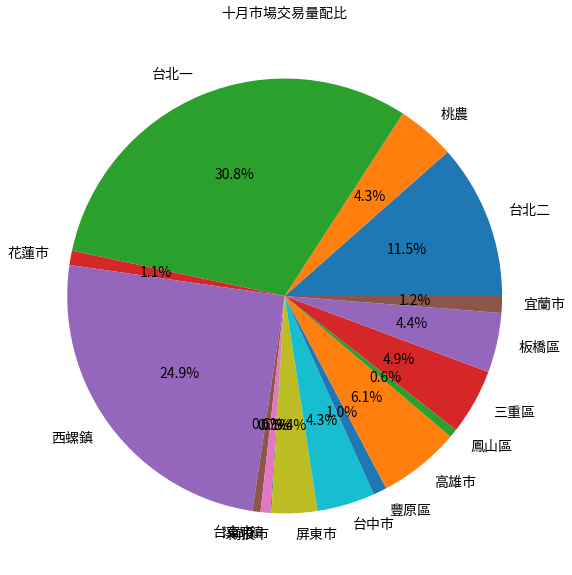

In [10]:
plt.figure( figsize=(10,10) )
plt.title('十月市場交易量配比',fontsize=14)
plt.pie(p2_quantity_list, labels=p2_market_name, autopct='%1.1f%%', textprops={'fontsize':14})
plt.show()

### 以長條圖呈現市場「高雄市」在這一年當中每個月的交易量
p3_tomato['TransDate'].str[4:-3] >> 這個很重要

In [11]:
p3_tomato = tomato

p3_month_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
p3_quantity_list = list()

for month in p3_month_list:
  trans_q = p3_tomato[ p3_tomato['TransDate'].str[4:-3]==month ]['Trans_Quantity'].sum()
  p3_quantity_list.append(trans_q)

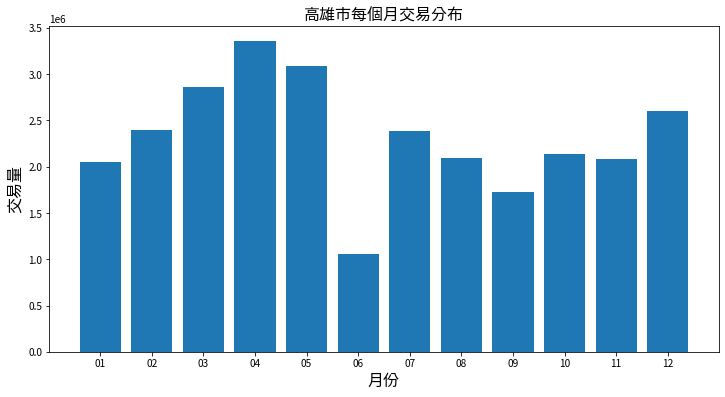

In [13]:
plt.figure( figsize=(12,6) )
plt.title('高雄市每個月交易分布',fontsize=16)
plt.xlabel('月份',fontsize=16)
plt.ylabel('交易量',fontsize=16)
plt.bar(p3_month_list, p3_quantity_list)
plt.show()

# 測試

In [63]:
tomato

,TransDate,CropCode,CropName,MarketCode,MarketName,Upper_Price,Middle_Price,Lower_Price,Avg_Price,Trans_Quantity
0,110.12.31,FJ3,番茄-牛番茄,104,台北二,26.3,19.0,11.1,18.9,19962.0
1,110.12.31,FJ3,番茄-牛番茄,109,台北一,34.0,21.6,11.0,22.0,35498.0
2,110.12.31,FJ3,番茄-牛番茄,220,板橋區,22.9,15.5,7.8,15.5,6473.0
3,110.12.31,FJ3,番茄-牛番茄,241,三重區,26.3,17.6,7.2,17.3,5519.0
4,110.12.31,FJ3,番茄-牛番茄,260,宜蘭市,35.0,23.0,10.0,23.0,2200.0
...,...,...,...,...,...,...,...,...,...,...
4035,110.01.01,FJ3,番茄-牛番茄,800,高雄市,49.1,38.3,19.3,36.7,4780.0
4036,110.01.01,FJ3,番茄-牛番茄,830,鳳山區,34.3,20.6,14.2,22.0,631.0
4037,110.01.01,FJ3,番茄-牛番茄,900,屏東市,34.3,24.8,13.8,24.5,1920.0
4038,110.01.01,FJ3,番茄-牛番茄,930,台東市,40.0,30.0,20.0,28.0,645.0
